<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Inferential_stats/12_Inference_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# Estimating the average weight of Women Olympians


In [3]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
df= df[df['sex'] == 'female']
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0


In [5]:
df_samp = df.sample(frac=0.1)    #draw the samples
df_samp.shape

(520, 11)

In [6]:
mean_hat = df_samp['weight'].mean()     # sample mean
mean_hat

62.113320079522865

In [7]:
mean_hat_samples=[]
for i in range(1000):
  sample=df.sample(frac=0.1)
  mean_sample=sample['weight'].mean()
  mean_hat_samples.append(mean_sample)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


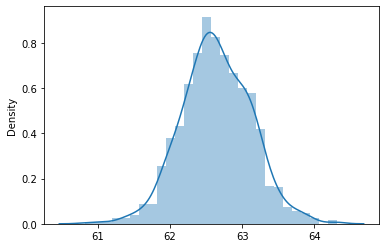

In [8]:
sns.distplot(mean_hat_samples)

In [9]:
std_hat = df['weight'].std()/np.sqrt(len(df_samp))  #sigma
std_hat

0.49340033884931866

In [10]:
z=stats.norm.ppf(q = 0.975)
z

1.959963984540054

In [11]:
lower_limit = mean_hat - z*std_hat
upper_limit = mean_hat + z*std_hat

lower_limit, upper_limit

(61.146273185418345, 63.080366973627385)

In [12]:
df['weight'].mean()                    #interval

62.64442668797443

unknown SD

In [14]:
freedom=len(df_samp) - 1                   

In [15]:
tscore=stats.t.ppf(0.975, freedom)
tscore

1.9645453314967687

In [17]:
std_hat = df_samp['weight'].std()/np.sqrt(len(df_samp))  #sigma
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= freedom,                    # Degrees of freedom
                 loc = mean_hat,         # Sample mean
                 scale = std_hat) 

(61.289366844495056, 62.93727331455067)